In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [24]:
df=tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\User\Desktop\Projects\Cricket Short Classification using CNN\data",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 4723 files belonging to 4 classes.


In [25]:
class_names=df.class_names
print(class_names)

['drive', 'legglance-flick', 'pullshot', 'sweep']


In [26]:
print(len(df))

148


In [27]:
148*32

4736

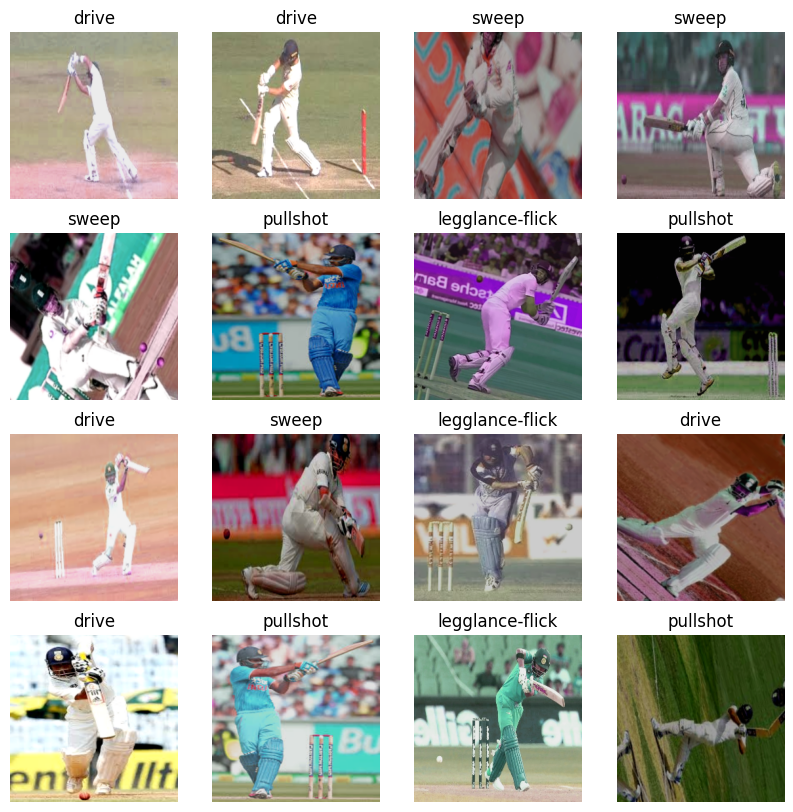

In [40]:
plt.figure(figsize=(10,10))
for images, labels in df.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds

In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(df)

In [31]:
print("Train size:", len(train_ds))
print("Validation size:", len(val_ds))
print("Test size:", len(test_ds))

Train size: 118
Validation size: 14
Test size: 16


In [32]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1./255)
])

In [34]:
model = models.Sequential([
    layers.Input(shape=(256,256,3)),
    resize_and_rescale,

    layers.Conv2D(16,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])


In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,836 (2.77 MB)

 Trainable params: 724,836 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer="adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

In [37]:
history=model.fit(train_ds,
                validation_data=val_ds,
                batch_size=32,
                epochs=10)

Epoch 1/10


118/118 ━━━━━━━━━━━━━━━━━━━━ 66s 481ms/step - accuracy: 0.3904 - loss: 1.2947 - val_accuracy: 0.5781 - val_loss: 1.1230
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 476ms/step - accuracy: 0.6120 - loss: 0.9457 - val_accuracy: 0.7612 - val_loss: 0.6826
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.7810 - loss: 0.6012 - val_accuracy: 0.8571 - val_loss: 0.4559
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 339ms/step - accuracy: 0.8435 - loss: 0.4092 - val_accuracy: 0.9018 - val_loss: 0.3093
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/step - accuracy: 0.9078 - loss: 0.2600 - val_accuracy: 0.9353 - val_loss: 0.1827
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 430ms/step - accuracy: 0.9397 - loss: 0.1718 - val_accuracy: 0.9576 - val_loss: 0.2052
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 432ms/step - accuracy: 0.9535 - loss: 0.1486 - val_accuracy: 0.8973 - val_loss: 0.2985
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 433ms/step - accuracy: 0.9625 - loss: 0.1139 - val

In [ ]:
model.evaluate(test_ds.skip(0))

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9766 - loss: 0.1159


[0.11586779356002808, 0.9765625]

In [39]:
model.evaluate(val_ds.skip(0))

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.9799 - loss: 0.1324


[0.13238219916820526, 0.9799107313156128]